<a href="https://colab.research.google.com/github/Dikshit-Bhattacharya/Audio-Sentiment-Analysis/blob/main/Audio_Speech_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y resampy librosa
!pip install resampy librosa

Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Successfully uninstalled resampy-0.4.3
Found existing installation: librosa 0.11.0
Uninstalling librosa-0.11.0:
  Successfully uninstalled librosa-0.11.0
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Music import
import librosa
import librosa.display

#Keras import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

#scikit import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

**Loading Dataset**

In [ ]:
train_csv = pd.read_csv('/content/drive/MyDrive/archive/TRAIN.csv')
train_audio_path = '/content/drive/MyDrive/archive/TRAIN'
test_audio_path = '/content/drive/MyDrive/archive/TEST'

**Data Preprocessing**

In [ ]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

features = []
labels = []

for index, row in train_csv.iterrows():
    file_path = os.path.join(train_audio_path, row['Filename'])
    data = extract_features(file_path)
    features.append(data)
    labels.append(row['Class'])

Audio EDA

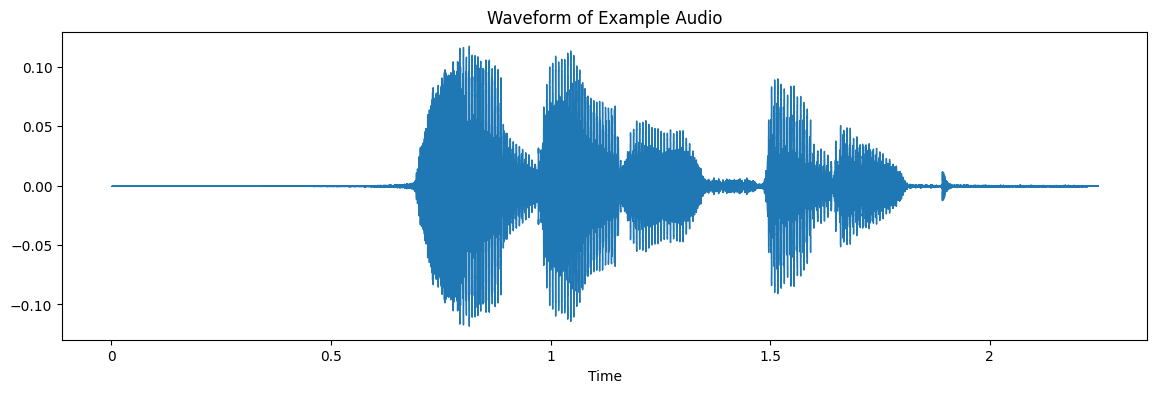

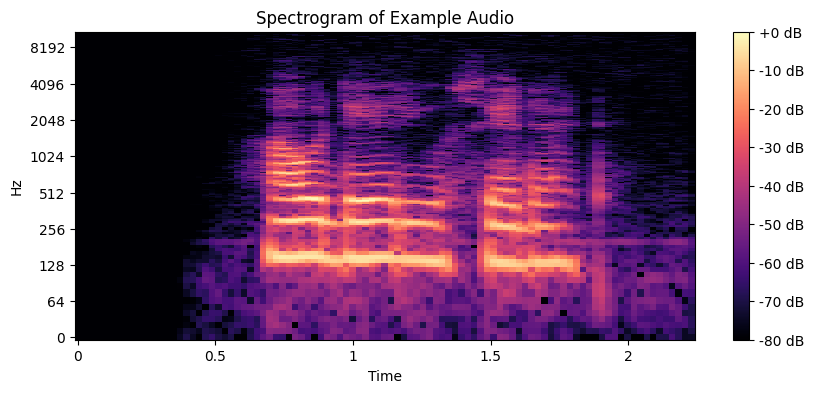

In [ ]:
# Example Audio Visualization
example_audio = os.path.join(train_audio_path, train_csv['Filename'].iloc[0])
audio, sr = librosa.load(example_audio)

# Waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform of Example Audio')
plt.show()

# Spectrogram
plt.figure(figsize=(10, 4))
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Example Audio')
plt.show()

**Train Test Split**

In [ ]:
X = np.array(features)
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Building CNN For Audio Sentiment**

In [ ]:
# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_val = X_val.reshape(X_val.shape[0], 40, 1, 1)

# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(40, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3530 - loss: 12.9235 - val_accuracy: 0.5800 - val_loss: 2.4096
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5017 - loss: 6.3353 - val_accuracy: 0.6600 - val_loss: 1.0526
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5571 - loss: 4.3450 - val_accuracy: 0.7600 - val_loss: 0.7715
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6316 - loss: 2.5259 - val_accuracy: 0.6200 - val_loss: 0.7964
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6989 - loss: 1.7323 - val_accuracy: 0.8600 - val_loss: 0.3412
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6209 - loss: 1.5121 - val_accuracy: 0.6200 - val_loss: 0.6596
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7071 - loss: 0.8427 - val_accuracy: 0.7600 - val_loss: 0.5056
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7733 - loss: 0.7495 - val_accuracy: 0.8800 - val_loss: 0.4121

**Evaluation**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8308 - loss: 0.2647
Validation Loss: 0.2596
Validation Accuracy: 0.8400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.80      0.75        15
     Neutral       1.00      1.00      1.00        20
    Positive       0.77      0.67      0.71        15

    accuracy                           0.84        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.84      0.84      0.84        50



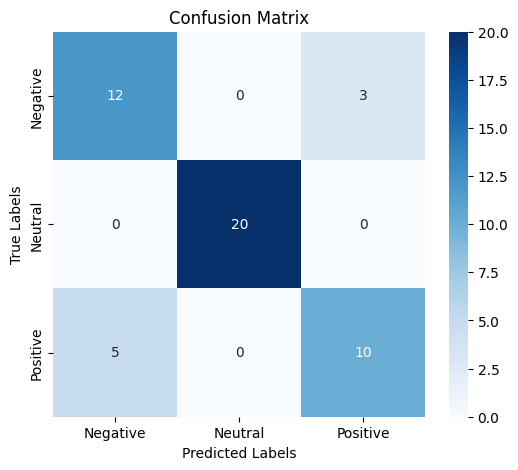

In [ ]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Predict Classes
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification Report 📊
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion Matrix 📉
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

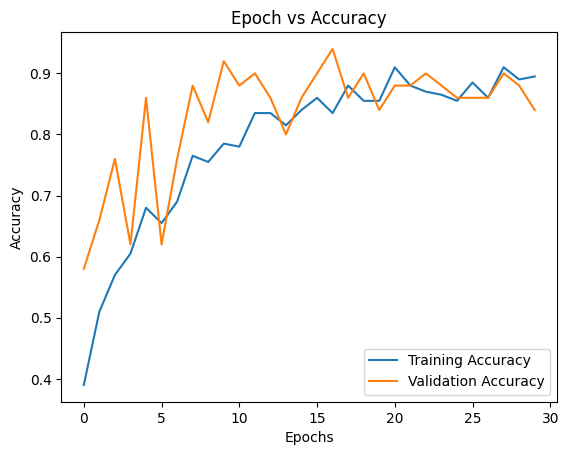

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.show()

**Prediction System**

In [ ]:
import numpy as np
import librosa
from IPython.display import Audio  # For playing audio

# Detection System
def predict_sentiment(audio_path):
    feature = extract_features(audio_path)         # Extract MFCC features
    feature = feature.reshape(1, 40, 1, 1)         # Reshape for CNN input
    prediction = model.predict(feature)            # Predict sentiment
    predicted_label = le.inverse_transform([np.argmax(prediction)])[0]
    return predicted_label

In [ ]:
# Test Audio Path
audio_path = '/content/drive/MyDrive/archive/TEST/112.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
🎯 Predicted Sentiment: Positive


In [ ]:
# Test Audio Path
audio_path = '/content/drive/MyDrive/archive/TEST/249.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
🎯 Predicted Sentiment: Negative


In [ ]:
# Test Audio Path
audio_path = '/content/drive/MyDrive/archive/TEST/142.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
🎯 Predicted Sentiment: Neutral


In [ ]:
# Test Audio Path
audio_path = '/content/drive/MyDrive/archive/TRAIN/346.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
🎯 Predicted Sentiment: Negative


**Save Files**

In [ ]:
import joblib

# Save the trained model
model.save('sentiment_cnn_model.h5')

# Save the Label Encoder
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
from google.colab import files

# Download the model file
files.download("sentiment_cnn_model.h5")

# Download the label encoder
files.download("label_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>